# COP ALLOCATION USING CRIME RATE                                                                                                                                                       

In [9]:

import numpy as np 
import pandas as pd 
df = pd.read_csv('Crimes_2012_to_2017.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [10]:

import folium
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

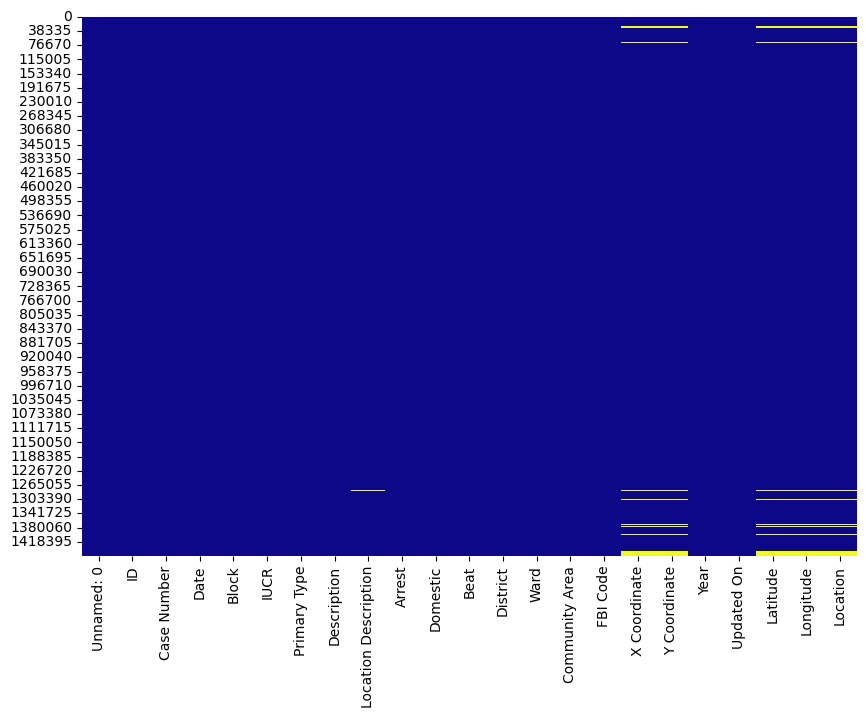

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cbar = False, cmap = 'plasma')

In [12]:
df = df.dropna()
df = df.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)

In [13]:
pd.value_counts(df['Location Description'])[:10]

C:\Users\santh\AppData\Local\Temp\ipykernel_11168\2398231440.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Location Description'])[:10]


Location Description
STREET                            325084
RESIDENCE                         223854
APARTMENT                         179444
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
Name: count, dtype: int64

In [14]:
pd.value_counts(df['Primary Type'])[:10]

C:\Users\santh\AppData\Local\Temp\ipykernel_11168\2640686239.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Primary Type'])[:10]


Primary Type
THEFT                  321950
BATTERY                258941
CRIMINAL DAMAGE        152812
NARCOTICS              131177
ASSAULT                 89508
OTHER OFFENSE           85361
BURGLARY                81668
DECEPTIVE PRACTICE      67609
MOTOR VEHICLE THEFT     59856
ROBBERY                 56092
Name: count, dtype: int64

In [16]:
print(df.columns)

Index(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Community Area', 'Year', 'Latitude', 'Longitude', 'Location'],
      dtype='object')


<Axes: xlabel='count', ylabel='Location Description'>

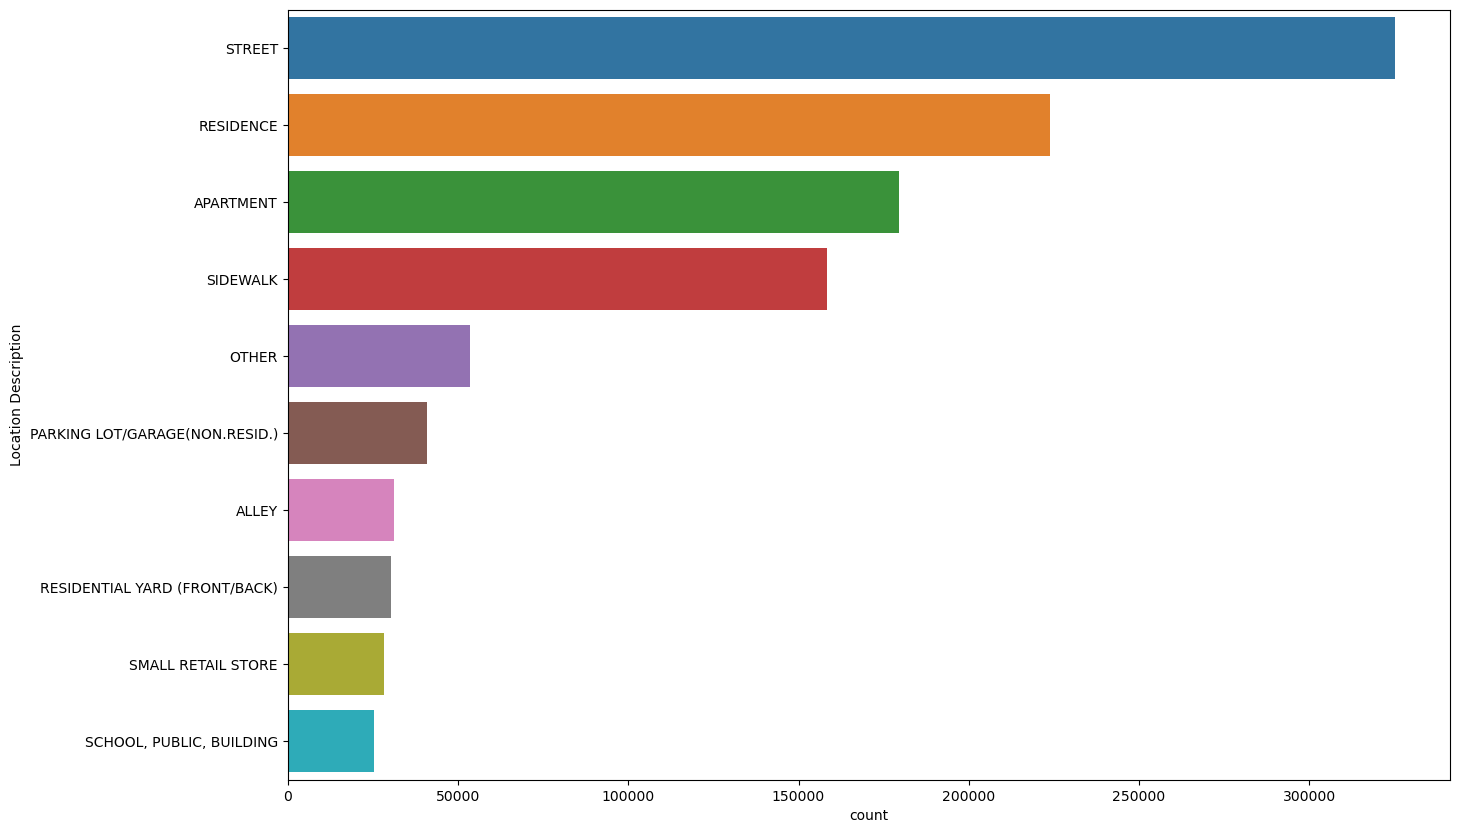

In [17]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:10].index)

In [18]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [42]:
locations = df.groupby('Community Area').first()

In [43]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_locations.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.799090,-87.790549,RESIDENCE-GARAGE,False
1.0,41.998131,-87.665814,SIDEWALK,False
2.0,41.999731,-87.705810,STREET,False
3.0,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4.0,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False


In [44]:
popup_text = """Community Index : {}<br
                Arrest : {}<br>
                Location Description : {}<br>"""

## FIRST MAP 

In [45]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

C:\Users\santh\AppData\Local\Temp\ipykernel_11168\407408224.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = new_locations.iloc[i][0]
C:\Users\santh\AppData\Local\Temp\ipykernel_11168\407408224.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  long = new_locations.iloc[i][1]
C:\Users\santh\AppData\Local\Temp\ipykernel_11168\407408224.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_locations.iloc[i][-1],
C:\Users\s

In [46]:
chicago_map

In [47]:
unique_locations = df['Location'].value_counts()

In [48]:
unique_locations.index

Index(['(41.883500187, -87.627876698)', '(41.754592961, -87.741528537)',
       '(41.979006297, -87.906463155)', '(41.897895128, -87.624096605)',
       '(41.742710224, -87.634088181)', '(41.909664252, -87.742728815)',
       '(41.896888586, -87.628203192)', '(41.885487535, -87.726422045)',
       '(41.868541914, -87.639235361)', '(41.976290414, -87.905227221)',
       ...
       '(41.730246222, -87.664627095)', '(41.709385144, -87.687883232)',
       '(41.790087773, -87.774410125)', '(42.014883545, -87.806598818)',
       '(41.9665584, -87.838730137)', '(41.921365415, -87.679387154)',
       '(41.688994937, -87.670081301)', '(41.688876828, -87.629461582)',
       '(41.796008842, -87.718333462)', '(41.75830866, -87.620658418)'],
      dtype='object', name='Location', length=368079)

## Criminal Rate Index

In [49]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",2093
1,"(41.754592961, -87.741528537)",2082
2,"(41.979006297, -87.906463155)",1338
3,"(41.897895128, -87.624096605)",1319
4,"(41.742710224, -87.634088181)",1122


In [50]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)    
    

In [51]:
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

## Map showing total criminal rates

In [52]:
%%time

chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 45
    
    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

CPU times: total: 15.6 ms
Wall time: 84.5 ms


In [53]:
chicago_map_crime

<Axes: xlabel='count', ylabel='Description'>

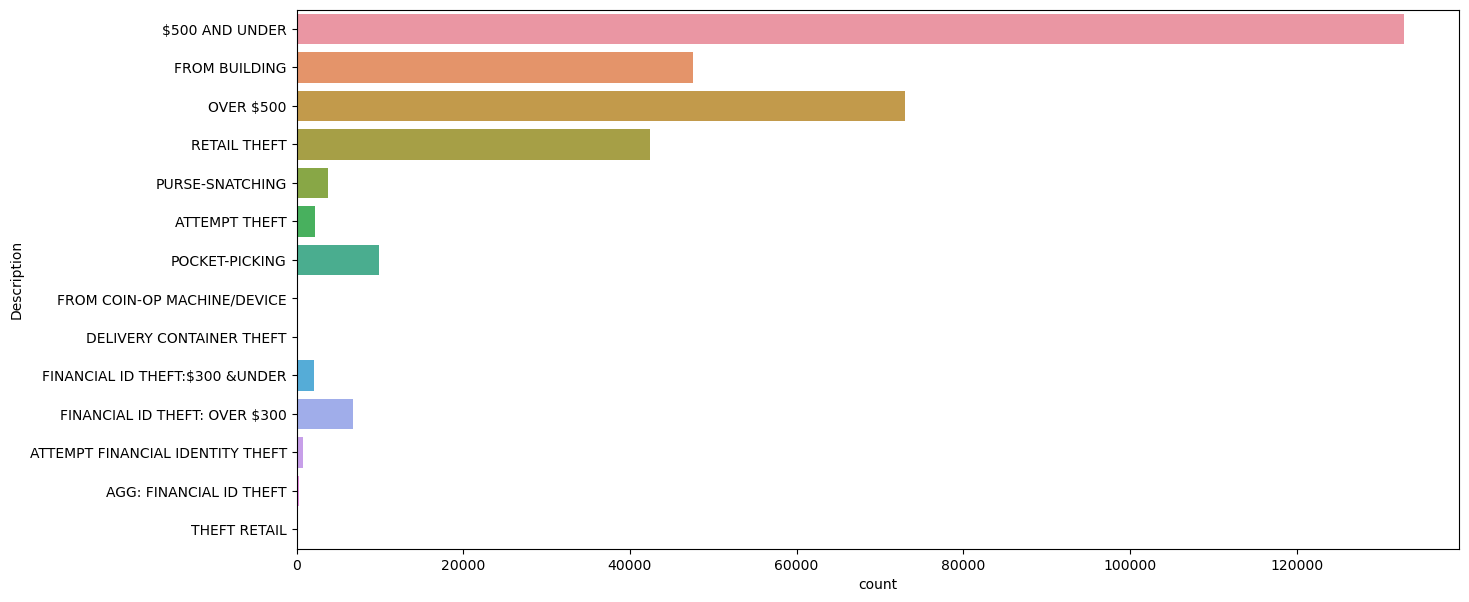

In [54]:
df_theft = df[df['Primary Type'] == 'THEFT']
plt.figure(figsize = (15, 7))
sns.countplot(y = df_theft['Description'])

<Axes: xlabel='Counts', ylabel='Description'>

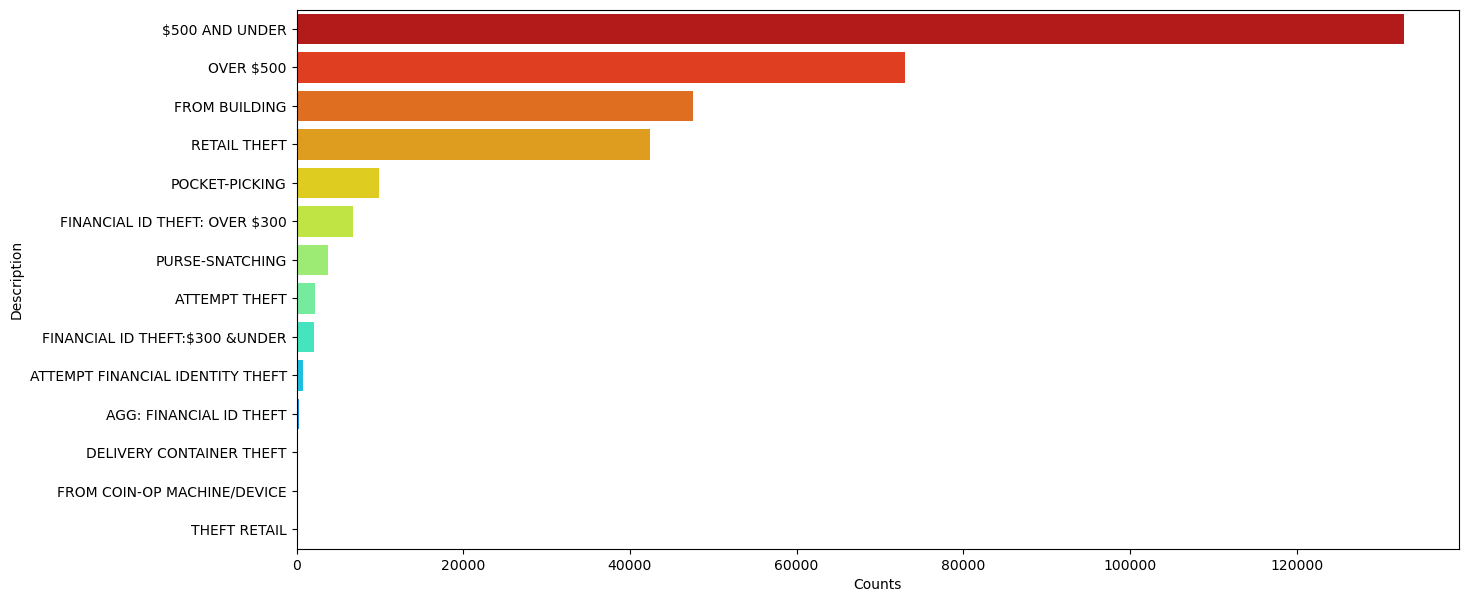

In [58]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_theft_data, palette="jet_r")

In [59]:
%%time
df_theft['Date'] = pd.to_datetime(df_theft['Date'])

<timed exec>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


CPU times: total: 7.48 s
Wall time: 15.6 s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [60]:
df_theft['Month'] = df_theft['Date'].apply(lambda x : x.month)

C:\Users\santh\AppData\Local\Temp\ipykernel_11168\2408992188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_theft['Month'] = df_theft['Date'].apply(lambda x : x.month)


In [61]:
theft_in_months = pd.DataFrame({"thefts" : df_theft['Month'].value_counts(), "month" : df_theft["Month"].value_counts().index}, index = range(12))

In [62]:
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])

In [63]:
theft_in_months.head()

,thefts,month
9,29039.0,1
11,25791.0,2
10,28556.0,3
8,31238.0,4
5,27630.0,5


## Monthly trend 

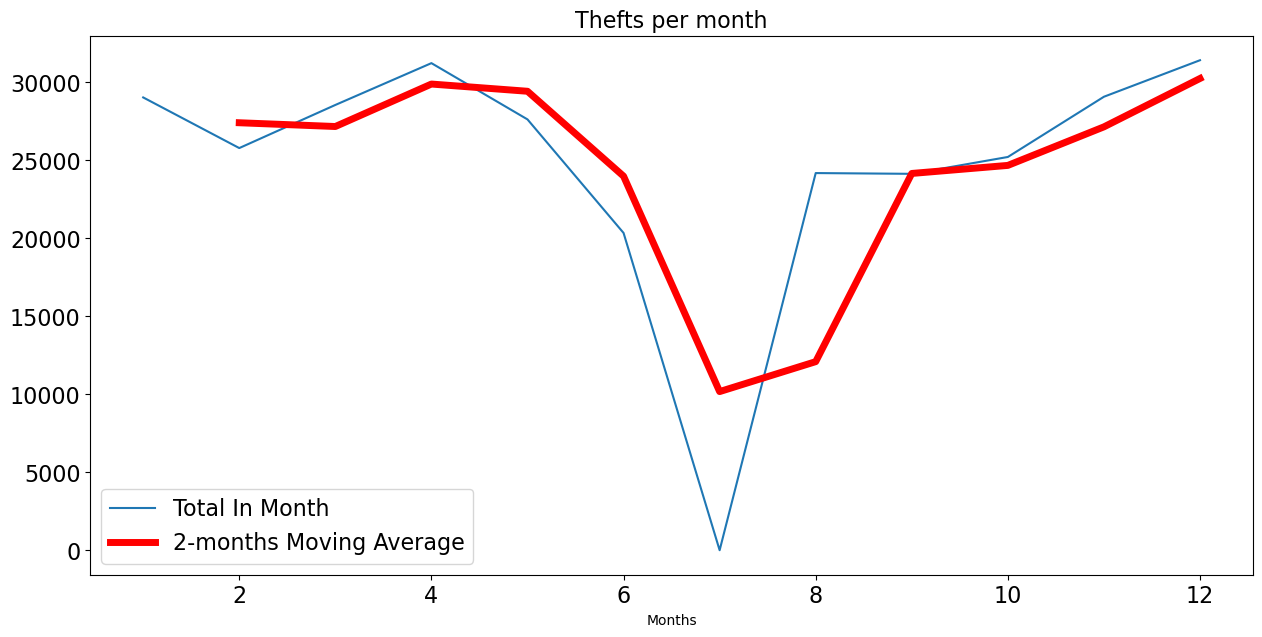

In [64]:
plt.figure(figsize = (15,7))
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='red', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [65]:
print(max(df_theft['Date']))
print(min(df_theft['Date']))

2016-12-31 23:59:00
2012-01-01 00:00:00


In [66]:
df_theft['Date'].iloc[0].date()

datetime.date(2016, 5, 3)

In [67]:
df_theft_dates = df_theft['Location']
df_theft_dates.index = df_theft['Date']
resampled = df_theft_dates.resample('D')
df_theft_dates['MEAN'] = resampled.size().mean()
df_theft_dates['STD'] = resampled.size().std()

C:\Users\santh\AppData\Local\Temp\ipykernel_11168\139134722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_theft_dates['MEAN'] = resampled.size().mean()
C:\Users\santh\AppData\Local\Temp\ipykernel_11168\139134722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_theft_dates['MEAN'] = resampled.size().mean()
C:\Users\santh\AppData\Local\Temp\ipykernel_11168\139134722.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_th

In [68]:
UCL = df_theft_dates['MEAN'] + 3 * df_theft_dates['STD']
LCL = df_theft_dates['MEAN'] -  3 * df_theft_dates['STD']

CPU times: total: 15.6 ms
Wall time: 115 ms


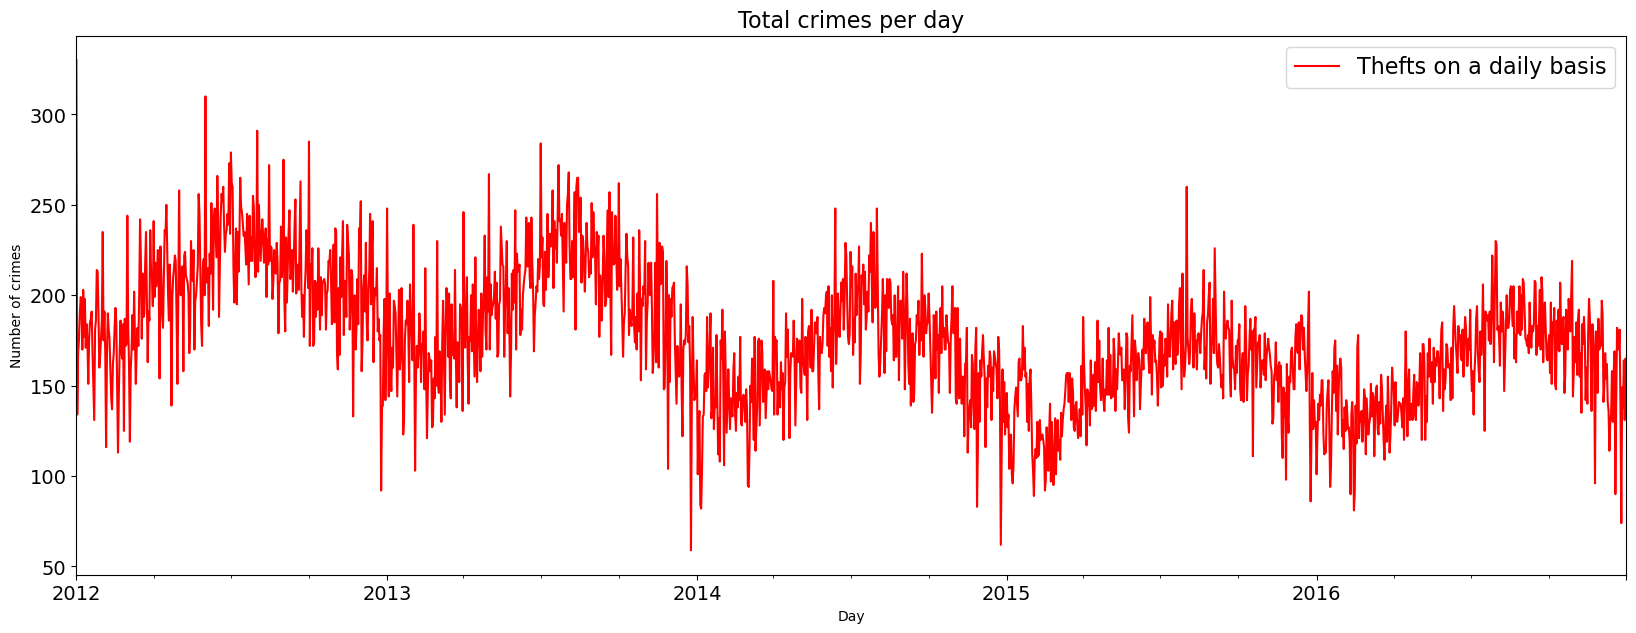

In [69]:
%%time

plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Thefts on a daily basis", color = 'red')
# plt.plot(y = UCL,x = resampled.index, color='red', ls='--', linewidth=1.5, label='UCL')

# LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
# df_theft_dates['MEAN'].plot(color='red', linewidth=2, label='Average')

plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

In [70]:
resampled.size().std()

35.512869628586344

## Here, the noticable trend is a rise in curve at the start of the year and achieveing the peak at the mid point. somehwhere at June - July . After that it has an equally sharp drop to the initial number of crimes as the year started!

In [71]:
df_public_peace =  df[df['Primary Type'] == 'PUBLIC PEACE VIOLATION']

<Axes: xlabel='Counts', ylabel='Description'>

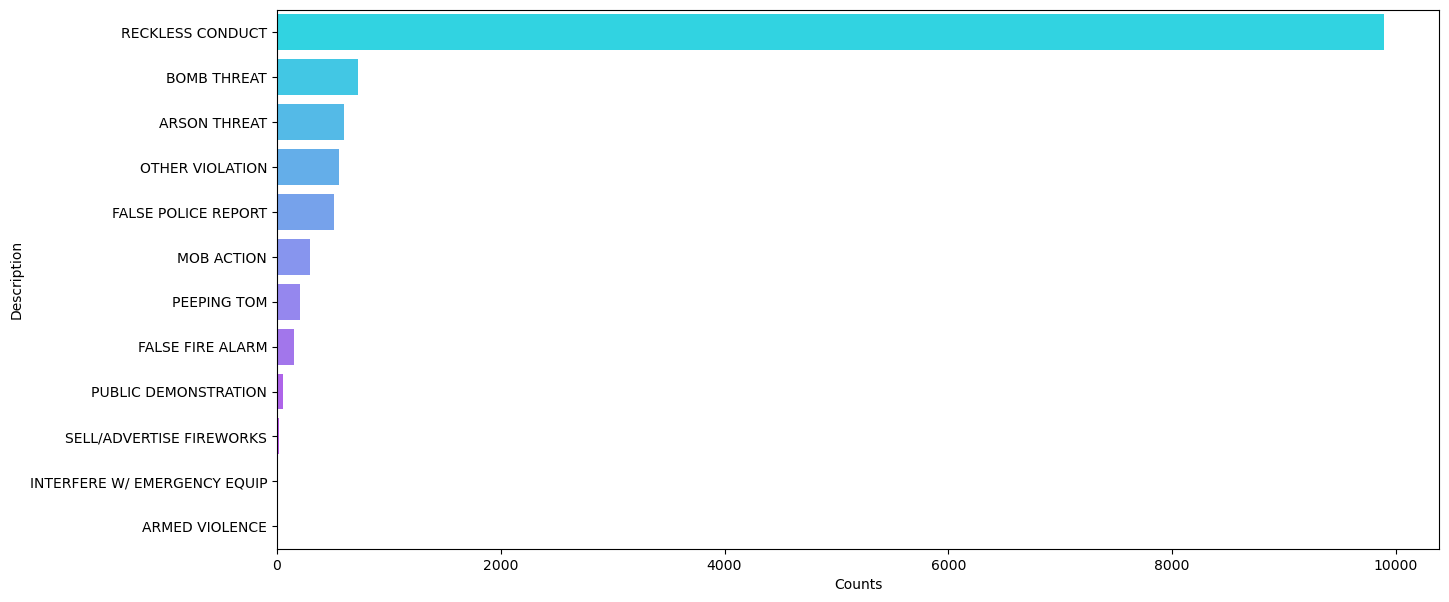

In [73]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_public_data, palette="cool")

## Sadly, Bomb and Arson Threats still are a major problem in society and it's obvious to notice that most of these threats are based in Schools or Public Places. 
But , can we predict where will be next Bombing threats? Let's check out that scenario.

In [74]:
unique_locations_bombs = df_public_peace['Location'].value_counts()

In [75]:
PB_index = pd.DataFrame({"Raw_String" : unique_locations_bombs.index, "ValueCount":unique_locations_bombs})
PB_index.index = range(len(unique_locations_bombs))
PB_index.head()

,Raw_String,ValueCount
0,"(41.754168689, -87.601635756)",54
1,"(41.78210152, -87.586502002)",54
2,"(41.946542477, -87.736084376)",50
3,"(41.807650669, -87.643080489)",48
4,"(41.73365047, -87.557845321)",39


In [76]:
PB_index['LocationCoord'] = PB_index['Raw_String'].apply(Location_extractor)
PB_index  = PB_index.drop(columns=['Raw_String'], axis = 1)

In [77]:
chicago_crime_pp = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13)

In [78]:
for i in range(500):
    lat = PB_index['LocationCoord'].iloc[i][0]
    long = PB_index['LocationCoord'].iloc[i][1]
    radius = PB_index['ValueCount'].iloc[i] / 3
    
    if PB_index['ValueCount'].iloc[i] > 30:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Peace Disruptions : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               PB_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_crime_pp)

In [79]:
folium.TileLayer('cartodbpositron').add_to(chicago_crime_pp)

In [80]:
chicago_crime_pp

In [83]:

file_path = 'Crimes_2012_to_2017.csv'

# Read the CSV file, ignoring lines with errors
data = pd.read_csv(file_path)


In [84]:
#Next we need to clean up the data

data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

data = data.drop(['Unnamed: 0', 'Case Number', 'Updated On','Community Area', 'Latitude', 'Longitude', 'Location'], axis=1)

# convert dates to pandas datetime format
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y %I:%M:%S %p')

# setting the index to be the date will help later on
data.index = pd.DatetimeIndex(data.Date)

#next, make the data less noisy by only keeping the top 20 location descriptions and crime descriptions
loc_to_change  = list(data['Location Description'].value_counts()[20:].index)
desc_to_change = list(data['Description'].value_counts()[20:].index)

data.loc[data['Location Description'].isin(loc_to_change), data.columns=='Location Description'] = 'OTHER'
data.loc[data['Description'].isin(desc_to_change), data.columns=='Description'] = 'OTHER'

In [85]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.to_numpy()), np.abs(np.min(df_marginal_scaled.to_numpy()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

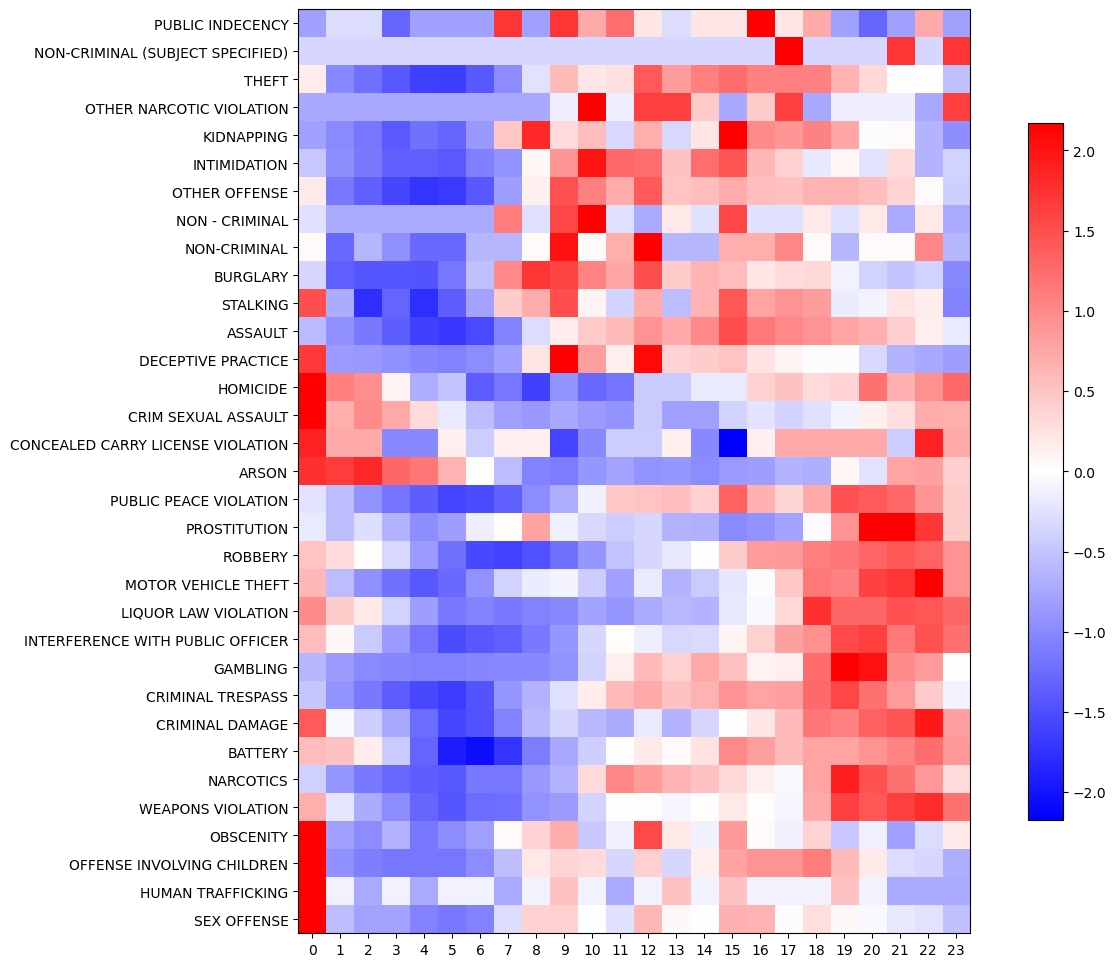

In [86]:

hour_by_type = data.pivot_table(values='ID', index='Primary Type', columns=data.index.hour, aggfunc=np.size).fillna(0)
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type)

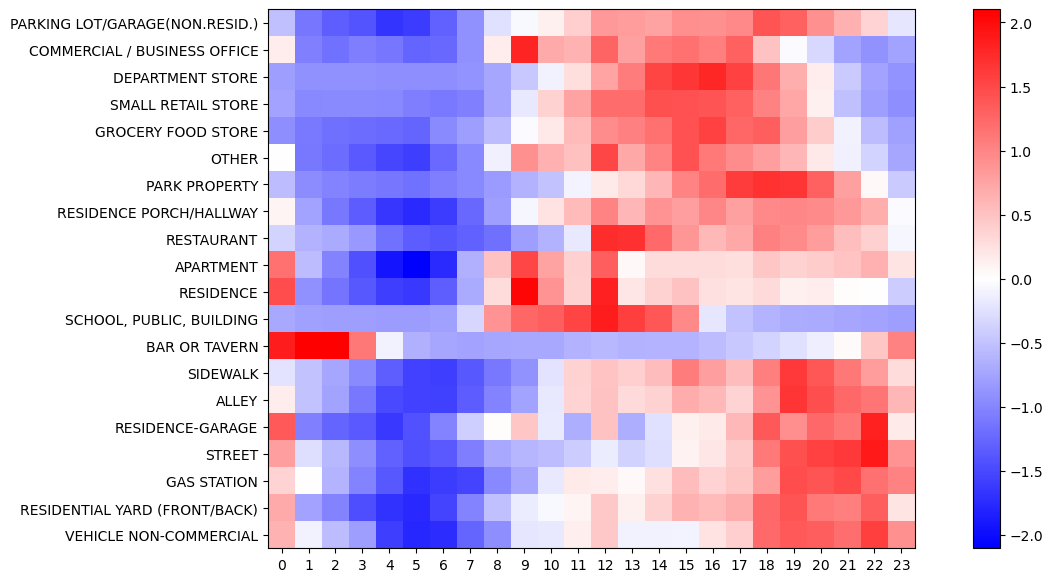

In [87]:
hour_by_location = data.pivot_table(values='ID', index='Location Description', columns=data.index.hour, aggfunc=np.size).fillna(0)
plt.figure(figsize=(15,7))
scale_and_plot(hour_by_location)

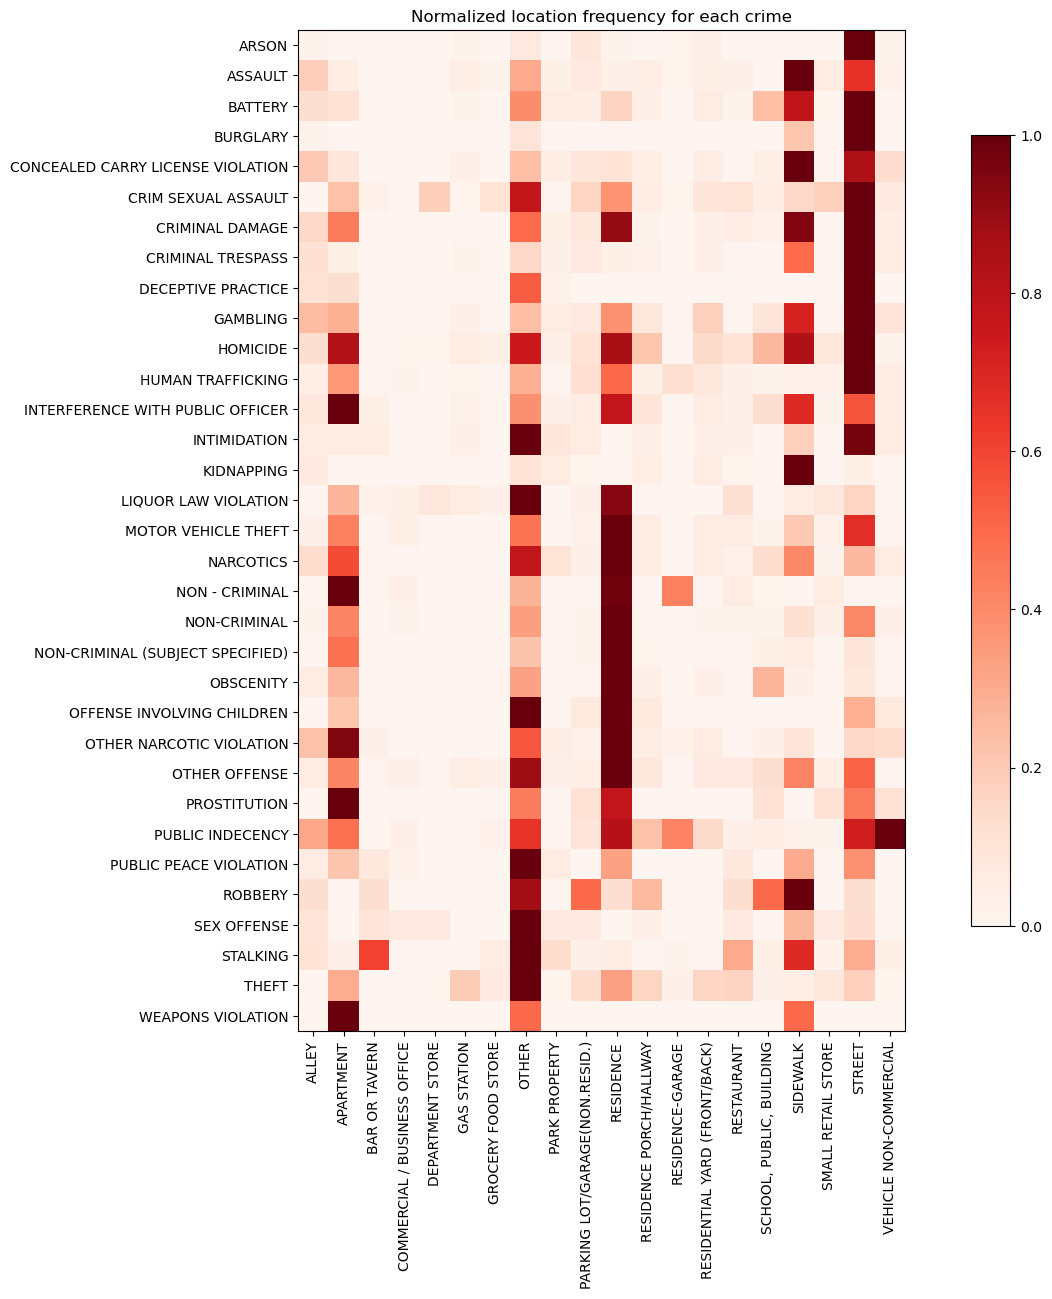

In [88]:
location_by_type = data.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

In [89]:
data.head(3)

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,X Coordinate,Y Coordinate,Year
Date,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,10508693,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,08B,1154907.0,1893681.0,2016
2016-05-03 21:40:00,10508695,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,08B,1183066.0,1864330.0,2016
2016-05-03 23:31:00,10508697,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,OTHER,STREET,False,False,1524,15.0,37.0,24,1140789.0,1904819.0,2016


In [90]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

data['Location Description'] = data['Location Description'].fillna('UNKNOWN')

lb_make = lb_make.fit(data['Location Description'])
data['Location Description'] = lb_make.transform(data['Location Description'])

#convert date to just the hour, didn't seem to make a substantial difference
data['Date'] = data.index.hour

lb_make = lb_make.fit(data['Block'])
data['Block'] = lb_make.transform(data['Block'])

lb_make = lb_make.fit(data['FBI Code'])
data['FBI Code'] = lb_make.transform(data['FBI Code'])

lb_make = lb_make.fit(data['IUCR'])
data['IUCR'] = lb_make.transform(data['IUCR'])

lb_make = lb_make.fit(data['Primary Type'])
data['Primary Type'] = lb_make.transform(data['Primary Type'])

lb_make = lb_make.fit(data['Description'])
data['Description'] = lb_make.transform(data['Description'])

data = data.drop('ID', axis = 1)

#start by splitting into test and training data
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)

#next we want to undersample to help with unbalanced issue
class0 = train.loc[train['Location Description'] == 0]
class1 = train.loc[train['Location Description'] == 1]
class2 = train.loc[train['Location Description'] == 2]
class3 = train.loc[train['Location Description'] == 3]
class4 = train.loc[train['Location Description'] == 4]
class5 = train.loc[train['Location Description'] == 5]
class6 = train.loc[train['Location Description'] == 6]
class7 = train.loc[train['Location Description'] == 7]
class8 = train.loc[train['Location Description'] == 8]
class9 = train.loc[train['Location Description'] == 9]
class10 = train.loc[train['Location Description'] == 10]
class11 = train.loc[train['Location Description'] == 11]
class12 = train.loc[train['Location Description'] == 12]
class13 = train.loc[train['Location Description'] == 13]
class14 = train.loc[train['Location Description'] == 14]
class15 = train.loc[train['Location Description'] == 15]
class16 = train.loc[train['Location Description'] == 16]
class17 = train.loc[train['Location Description'] == 17]
class18 = train.loc[train['Location Description'] == 18]
class19 = train.loc[train['Location Description'] == 19]
class20 = train.loc[train['Location Description'] == 20]

from sklearn.utils import resample
class0 = resample(class0, replace=True, n_samples = 6000)
class1 = resample(class1, replace=True, n_samples = 6000)
class2 = resample(class2, replace=True, n_samples = 6000)
class3 = resample(class3, replace=True, n_samples = 6000)
class4 = resample(class4, replace=True, n_samples = 6000)
class5 = resample(class5, replace=True, n_samples = 6000)
class6 = resample(class6, replace=True, n_samples = 6000)
class7 = resample(class7, replace=True, n_samples = 6000)
class8 = resample(class8, replace=True, n_samples = 6000)
class9 = resample(class9, replace=True, n_samples = 6000)
class10 = resample(class10, replace=True, n_samples = 6000)
class11 = resample(class11, replace=True, n_samples = 6000)
class12 = resample(class12, replace=True, n_samples = 6000)
class13 = resample(class13, replace=True, n_samples = 6000)
class14 = resample(class14, replace=True, n_samples = 6000)
class15 = resample(class15, replace=True, n_samples = 6000)
class16 = resample(class16, replace=True, n_samples = 6000)
class17 = resample(class17, replace=True, n_samples = 6000)
class18 = resample(class18, replace=True, n_samples = 6000)
class19 = resample(class19, replace=True, n_samples = 6000)
class20 = resample(class20, replace=True, n_samples = 6000)


balanced = pd.concat([class0, class1, class2, class3, class4, class5, class6, class7, class8, class9, class10, class11, class12, class13, class14, class15, class16, class17, class18, class19, class20])
balanced['Location Description'].value_counts()

x_train = balanced.drop('Location Description', axis = 1)
y_train =  balanced['Location Description']

#split test data into classification and features
x_test = test.drop('Location Description', axis = 1)
y_test =  test['Location Description']

x_train = x_train.fillna(0)
y_train = y_train.fillna(0)
x_test = x_test.fillna(0)
y_test = y_test.fillna(0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [91]:
data.head(3)

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,X Coordinate,Y Coordinate,Year
Date,,,,,,,,,,,,,,,
2016-05-03 23:40:00,23,6521,51,2,5,1,True,True,1022,10.0,24.0,10,1154907.0,1893681.0,2016
2016-05-03 21:40:00,21,24531,51,2,5,10,False,True,313,3.0,20.0,10,1183066.0,1864330.0,2016
2016-05-03 23:31:00,23,22015,42,27,9,18,False,False,1524,15.0,37.0,24,1140789.0,1904819.0,2016


In [92]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.06      0.15      0.08      6322
           1       0.37      0.24      0.29     36804
           2       0.15      0.51      0.23      1989
           3       0.04      0.24      0.07      1552
           4       0.40      0.61      0.48      4089
           5       0.09      0.32      0.14      3124
           6       0.21      0.50      0.30      3122
           7       0.35      0.16      0.22     40653
           8       0.07      0.31      0.11      2470
           9       0.10      0.20      0.14      8326
          10       0.43      0.22      0.29     46558
          11       0.04      0.13      0.06      5164
          12       0.14      0.38      0.21      5015
          13       0.05      0.13      0.07      6249
          14       0.13      0.27      0.17      5193
          15       0.25      0.54      0.34      5153
          16       0.30      0.18      0.22     32359
          17       0.15    

In [95]:
#time to do predictions and evaluation
predictions = mlp.predict(x_test)
# from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.07      0.22      0.11      6322
           1       0.42      0.31      0.36     36804
           2       0.09      0.66      0.16      1989
           3       0.04      0.19      0.07      1552
           4       0.37      0.57      0.45      4089
           5       0.07      0.25      0.11      3124
           6       0.29      0.37      0.32      3122
           7       0.52      0.05      0.09     40653
           8       0.04      0.29      0.07      2470
           9       0.11      0.17      0.13      8326
          10       0.49      0.26      0.34     46558
          11       0.06      0.10      0.07      5164
          12       0.13      0.65      0.22      5015
          13       0.06      0.12      0.08      6249
          14       0.15      0.26      0.19      5193
          15       0.15      0.61      0.24      5153
          16       0.39      0.21      0.27     32359
          17       0.25    

In [97]:
#time to do predictions and evaluation
predictions = mlp.predict(x_test)
# from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.88      0.97      0.92    269343
        True       0.87      0.63      0.73     94836

    accuracy                           0.88    364179
   macro avg       0.87      0.80      0.82    364179
weighted avg       0.88      0.88      0.87    364179

